# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [1]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt


from skimage import img_as_ubyte
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage.morphology import disk
from skimage.morphology import erosion
from skimage.morphology import dilation
from skimage.morphology import opening
from skimage.morphology import closing



Pretty printing has been turned OFF


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

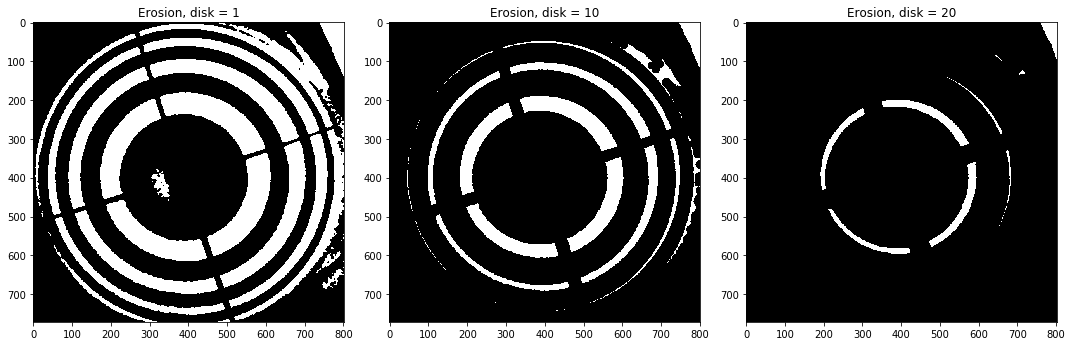

In [2]:
filename = './images/FindingContours.png'
im = io.imread(filename)
im = img_as_float(im)

ime1 = erosion(im, disk(1))
ime10 = erosion(im, disk(10))
ime20 = erosion(im, disk(20))


fig=plt.figure(figsize=(15,15))
plt.subplot(131)
io.imshow(ime1)
plt.title('Erosion, disk = 1')

plt.subplot(132)
io.imshow(ime10)
plt.title('Erosion, disk = 10')

plt.subplot(133)
io.imshow(ime20)
plt.title('Erosion, disk = 20')




** Q.1.2 Dilation **

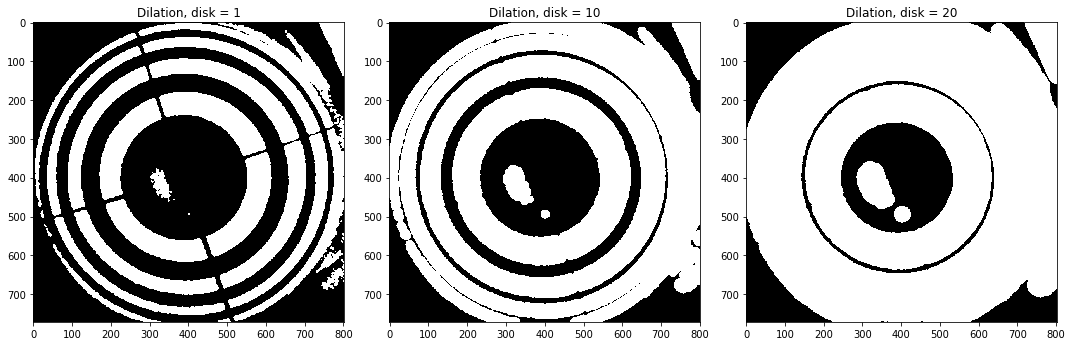

In [3]:
imd1 = dilation(im, disk(1))
imd10 = dilation(im, disk(10))
imd20 = dilation(im, disk(20))


fig=plt.figure(figsize=(15,15))
plt.subplot(131)
io.imshow(imd1)
plt.title('Dilation, disk = 1')

plt.subplot(132)
io.imshow(imd10)
plt.title('Dilation, disk = 10')

plt.subplot(133)
io.imshow(imd20)
plt.title('Dilation, disk = 20')

** Q.1.3 Opening **

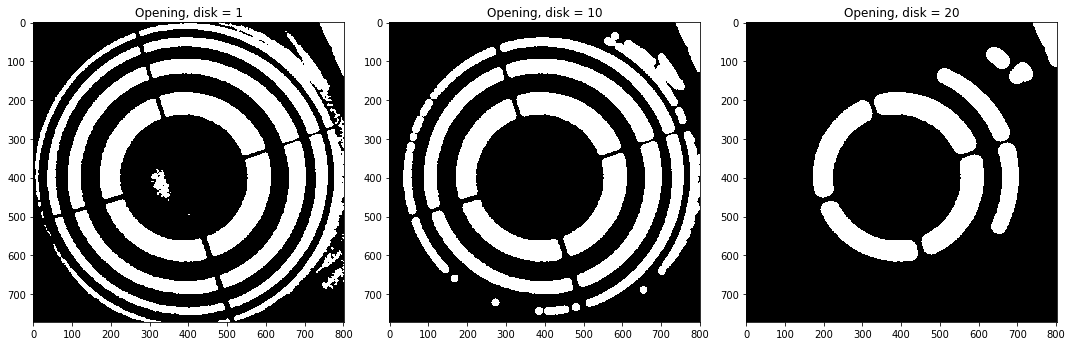

In [4]:
imo1 = opening(im, disk(1))
imo10 = opening(im, disk(10))
imo20 = opening(im, disk(20))


fig=plt.figure(figsize=(15,15))
plt.subplot(131)
io.imshow(imo1)
plt.title('Opening, disk = 1')

plt.subplot(132)
io.imshow(imo10)
plt.title('Opening, disk = 10')

plt.subplot(133)
io.imshow(imo20)
plt.title('Opening, disk = 20')

** Q.1.4 Closing**

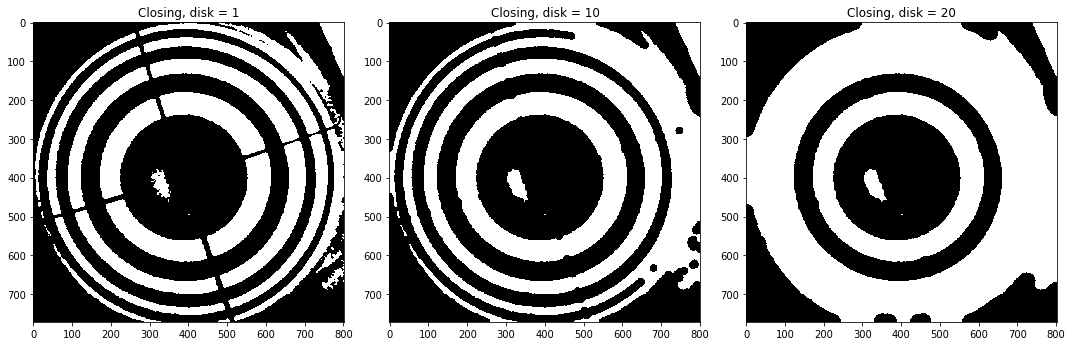

In [5]:
imc1 = closing(im, disk(1))
imc10 = closing(im, disk(10))
imc20 = closing(im, disk(20))


fig=plt.figure(figsize=(15,15))
plt.subplot(131)
io.imshow(imc1)
plt.title('Closing, disk = 1')

plt.subplot(132)
io.imshow(imc10)
plt.title('Closing, disk = 10')

plt.subplot(133)
io.imshow(imc20)
plt.title('Closing, disk = 20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


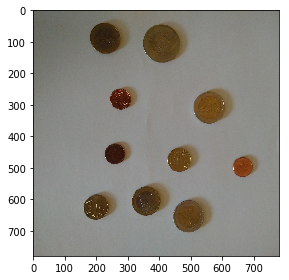

In [6]:
from skimage.transform import resize
filename = './images/coins.jpg'
img = io.imread(filename)
img = img_as_ubyte(img)
img = rescale(img, 0.25)
io.imshow(img)

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

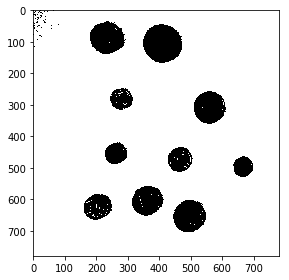

In [7]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
img = rgb2gray(img)
t = threshold_otsu(img)
mask = img>t
io.imshow(mask)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

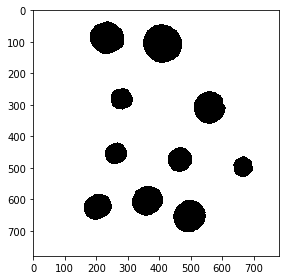

In [8]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
img = rgb2gray(img)
t = threshold_otsu(img)
mask = img>t

mask = closing(mask, disk(2))
mask = opening(mask, disk(15))
mask = closing(mask, disk(3))
mask = opening(mask, disk(15))


io.imshow(mask)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The number of regions is: 10
The radius of the region is 53 pxs
The area of the region is 8860 pxs
The radius of the region is 61 pxs
The area of the region is 11948 pxs
The radius of the region is 35 pxs
The area of the region is 3880 pxs
The radius of the region is 51 pxs
The area of the region is 8159 pxs
The radius of the region is 35 pxs
The area of the region is 3823 pxs
The radius of the region is 39 pxs
The area of the region is 4846 pxs
The radius of the region is 32 pxs
The area of the region is 3211 pxs
The radius of the region is 48 pxs
The area of the region is 7347 pxs
The radius of the region is 42 pxs
The area of the region is 5732 pxs
The radius of the region is 51 pxs
The area of the region is 8320 pxs


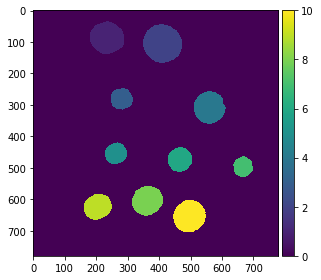

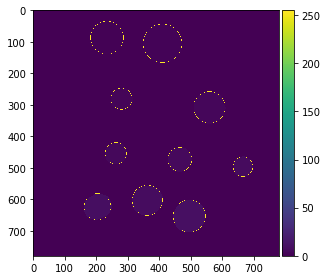

In [9]:
from skimage.draw import circle_perimeter
from skimage.measure import label
from skimage.measure import regionprops
img_label = label(mask, background = True)
regions = regionprops(img_label)

io.imshow(img_label)

print('The number of regions is: {}'.format(len(regions)))

for idx_region, region in enumerate(regions):
    radius = region.equivalent_diameter / 2.
    print('The radius of the region is {:.0f} pxs'.format(radius))
    print('The area of the region is {:.0f} pxs'.format(region.convex_area))
    circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]), int(radius))
    img_label[circle_coord[0], circle_coord[1]] = 255
plt.figure()
io.imshow(img_label)

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

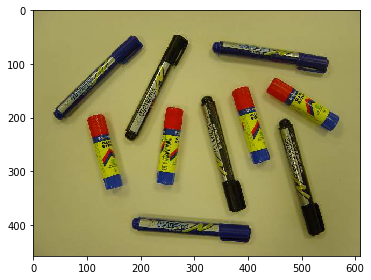

In [13]:
from skimage.transform import resize
filename = './images/objets4.jpg'
img = io.imread(filename)
img = img_as_ubyte(img)

io.imshow(img)


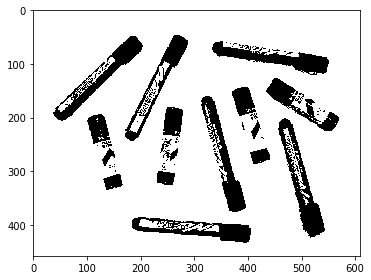

In [14]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
img = rgb2gray(img)
t = threshold_otsu(img)
mask = img>t
io.imshow(mask)

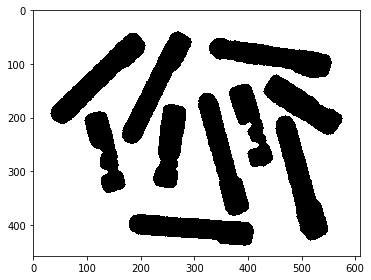

In [176]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
img = rgb2gray(img)
t = threshold_otsu(img)
mask = img>t

mask1 = erosion(mask, disk(6))
mask2 = opening(mask1, disk(4))
mask3 = closing(mask2, disk(9))

io.imshow(mask3)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The number of regions is: 10


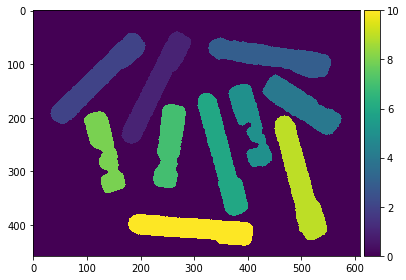

In [178]:
img_label = label(mask3, background = True)
regions = regionprops(img_label)

io.imshow(img_label)

print('The number of regions is: {}'.format(len(regions)))


In [194]:
sum_len = 0
for idx,region in enumerate(regions):
    length = region.major_axis_length
    sum_len = sum_len + length
    print('The length of the object is {:.0f} pxs'.format(length))
    print('The area of the region is {:.0f} pxs'.format(region.convex_area))
mean_len = sum_len / (len(regions))
markers = sum (region.major_axis_length > mean_len for idx,region in enumerate(regions))
glues = (len(regions)) - markers
print('The number of markers is {}'.format(markers))
print('The number of glues is {}'.format(glues))

The length of the object is 260 pxs
The area of the region is 9365 pxs
The length of the object is 254 pxs
The area of the region is 9614 pxs
The length of the object is 262 pxs
The area of the region is 10208 pxs
The length of the object is 176 pxs
The area of the region is 7471 pxs
The length of the object is 187 pxs
The area of the region is 7024 pxs
The length of the object is 269 pxs
The area of the region is 9667 pxs
The length of the object is 178 pxs
The area of the region is 6935 pxs
The length of the object is 180 pxs
The area of the region is 6711 pxs
The length of the object is 268 pxs
The area of the region is 10657 pxs
The length of the object is 267 pxs
The area of the region is 9716 pxs
The number of markers is 6
The number of glues is 4
